# EDA with Python and applying Logistic Regression

# Problem statement 

Looked into the data to recognize and identify patterns.
Explored titanic dataset & explored about the people,both who survived and did not survive. What factors made people more likely to survive the sinking of the titanic. Analysed the data visually by plotting charts,plots,heatmap,boxplot,histogram,etc. Used Logistic Regression.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Collecting Data

Reading in the titanic_dataset.csv file into a pandas dataframe.

In [3]:
A = pd.read_csv("E:/desktop/titanic_dataset.csv")

In [4]:
A.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Number of passengers in original data: " +str(len(A.index)))

Number of passengers in original data: 891


# Exploratory Data Analysis

# Analyzing Data


Creating different plots to check the relationship between variables. Simply explore the data by using various columns

<AxesSubplot:xlabel='Survived', ylabel='count'>

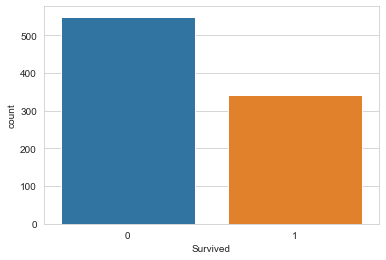

In [6]:
sb.set_style("whitegrid")
sb.countplot(x = "Survived", data=A)

0 --> Not survived 1 --> Survived


<AxesSubplot:xlabel='Survived', ylabel='count'>

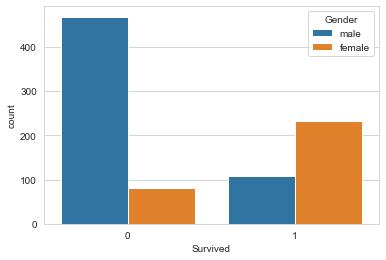

In [8]:
#To check how many were men and how many were women
sb.set_style("whitegrid")
sb.countplot(x = "Survived", hue = "Gender", data=A)

Analysis: The number of men who did not survive is more as compared to women.


<AxesSubplot:xlabel='Survived', ylabel='count'>

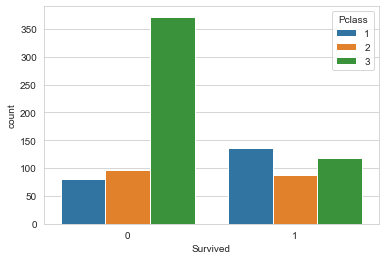

In [9]:
#To check the class of passengers who did not survive
sb.set_style("whitegrid")
sb.countplot(x = "Survived", hue="Pclass" ,data=A)


Analysis: Number of people who did not survive is more from Class 3

<AxesSubplot:xlabel='SibSp', ylabel='count'>

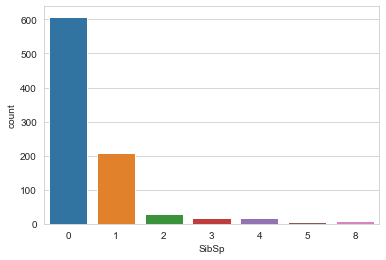

In [10]:
#To check SibSp
sb.set_style("whitegrid")
sb.countplot(x = "SibSp" ,data=A)

<AxesSubplot:ylabel='Frequency'>

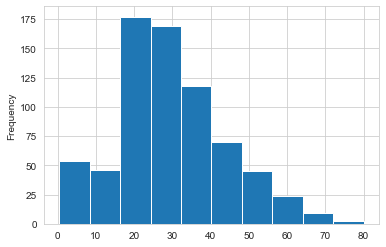

In [11]:
#to check the age of passengers travelling in titanic
sb.set_style("whitegrid")
A["Age"].plot.hist()

Analysis: People of age ranging 20-30 is more

<AxesSubplot:ylabel='Frequency'>

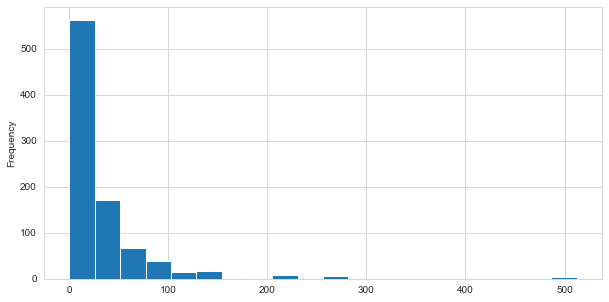

In [12]:
#To check the average fare of the people who have bought the ticket
sb.set_style("whitegrid")
A["Fare"].plot.hist(bins=20 , figsize = (10,5))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

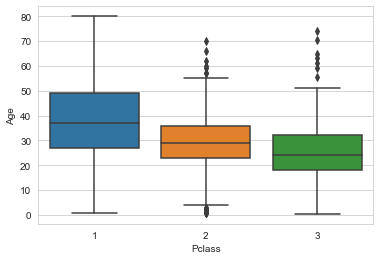

In [13]:
sb.set_style("whitegrid")
sb.boxplot(x = "Pclass", y = "Age",data=A)

Analysis: Passengers in class 1 & 2 are older than in class 3.

In [14]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Data Treatment



Cleaning the data by removing NaN values and unnecessary columns from the dataset

In [15]:
A.isnull() #True -- If it is null
           #False -- If it is not null

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
A.isnull().sum() #age,cabin,embarked columns have missing values in them.

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

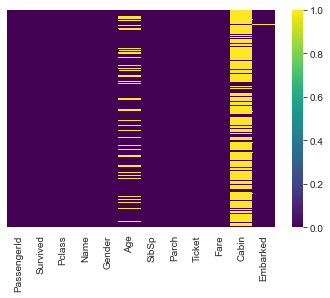

In [17]:
#To analyze them visually, use seaborn to create a simple heatmap to see where is the data missing.
sb.heatmap(A.isnull(), yticklabels = False , cmap = "viridis")

Roughly 20 percent of the Age data is missing. Looking at the cabin column,it looks like too much data is missing.


In order to remove these columns- Either drop them or replace them and put dummy values to it.


In [18]:
A.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
A.drop("Cabin", axis=1, inplace=True) #drop the cabin column
A.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
A.dropna(inplace=True) #drop Na values

<AxesSubplot:>

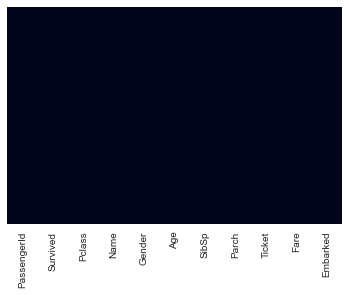

In [22]:
#to check if the values have been removed or not.
sb.heatmap(A.isnull(), yticklabels=False , cbar = False)

In [23]:
A.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All 0's tell us that the dataset does not contain any null value.

# Coverting Categorical Features


In [24]:
A.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


The data has lot of string values.Have to convert categorical featues to dummy variables using pandas. Otherwise the machine learning algorithm won't be able to directly take in those features as input.

In [25]:
G = pd.get_dummies(A["Gender"],drop_first=True)
G

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [26]:
E= pd.get_dummies(A["Embarked"], drop_first=True)
E

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [27]:
Pcl = pd.get_dummies(A["Pclass"],drop_first=True)
Pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [28]:
#concatenate all the new rows into the dataset
A = pd.concat([A,G,E,Pcl],axis=1)
A.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [29]:
#drop unnecessary columns from the dataset
A.drop(["PassengerId","Pclass","Name","Gender","Ticket","Embarked"],axis=1,inplace=True)
A.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Building a Logistic Regression Model


 Splitting the data into training set and testing set.



# Train Test Split


In [30]:
X = A.drop("Survived",axis=1)
Y = A[["Survived"]]

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=31)

In [32]:
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lrmodel = lr.fit(xtrain,ytrain)

In [33]:
pred = lrmodel.predict(xtest)

In [34]:
pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

# Accuracy Check



calculate accuracy to check how accurate the results are.

In [35]:
#to calculate classification report
from sklearn.metrics import classification_report
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.85      0.83        84\n           1       0.76      0.71      0.74        59\n\n    accuracy                           0.79       143\n   macro avg       0.79      0.78      0.78       143\nweighted avg       0.79      0.79      0.79       143\n'

In [36]:
#to calculate accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred)

array([[71, 13],
       [17, 42]], dtype=int64)

In [37]:
#accuracy score calculated from
(71+42)/(71+13+17+42)

0.7902097902097902

In [38]:
#to calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.7902097902097902

# Therefore,accuracy is 0.79 i.e. 79%


In [39]:
ytest["Predicted"] = pred
ytest

,Survived,Predicted
4,0,0
523,1,1
102,0,1
544,0,0
874,1,1
...,...,...
412,1,1
797,1,1
679,1,1
164,0,0
